<a href="https://colab.research.google.com/github/SatyaPraveenKumarreddyYalla/irisclassification/blob/main/IRIS_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libries/Modules

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn import KNN
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans

#Data_Processing

In [ ]:
df = pd.read_csv('/content/sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
le = LabelEncoder()
df1 = df.copy()
df1['Species'] = le.fit_transform(df1['Species'])
df1.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


K = 1: Accuracy = 0.9778
Confusion Matrix:
[[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      0.92      0.96        13
           2       0.93      1.00      0.96        13

    accuracy                           0.98        45
   macro avg       0.98      0.97      0.97        45
weighted avg       0.98      0.98      0.98        45


K = 3: Accuracy = 1.0000
Confusion Matrix:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45


K = 5: Accuracy = 1.0000
Con

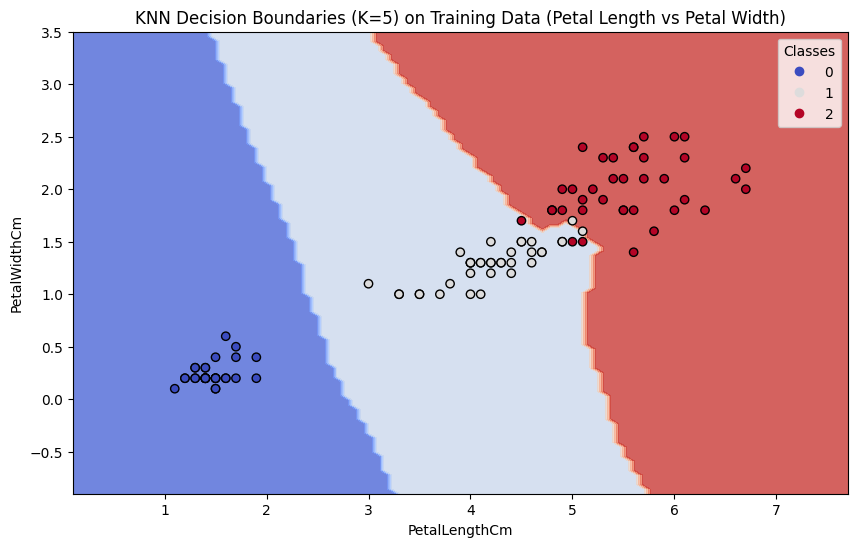

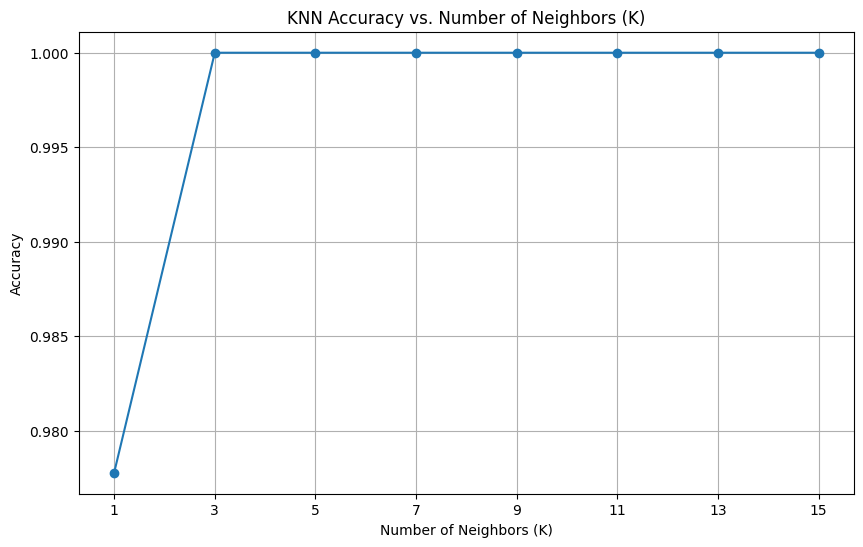

In [ ]:
# Drop the 'Id' column as it's not a feature for classification
df1 = df1.drop('Id', axis=1)

# Separate features (X) and target (y)
X = df1.drop('Species', axis=1)
y = df1['Species']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Experiment with different values of K
k_values = [1, 3, 5, 7, 9, 11, 13, 15]
accuracy_scores = []
confusion_matrices = {}

for k in k_values:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_scaled, y_train)
  y_pred = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred)
  cm = confusion_matrix(y_test, y_pred)

  accuracy_scores.append(accuracy)
  confusion_matrices[f'K={k}'] = cm

  print(f"K = {k}: Accuracy = {accuracy:.4f}")
  print(f"Confusion Matrix:\n{cm}\n")
  print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")


# Visualize decision boundaries for a selected K (e.g., K=5)
# For visualization, we'll train a model on the original (unscaled) data for simplicity
# or focus on pairs of features. Let's visualize for K=5 using two features.

# Let's choose PetalLengthCm and PetalWidthCm for visualization
X_train_viz = X_train[['PetalLengthCm', 'PetalWidthCm']]
X_test_viz = X_test[['PetalLengthCm', 'PetalWidthCm']]

knn_viz = KNeighborsClassifier(n_neighbors=5)
knn_viz.fit(X_train_viz, y_train)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
ax = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    knn_viz,
    X_train_viz,
    response_method="predict",
    cmap=plt.cm.coolwarm,
    alpha=0.8,
    ax=ax,
    xlabel='PetalLengthCm',
    ylabel='PetalWidthCm'
)

# Plot training points
scatter = ax.scatter(X_train_viz['PetalLengthCm'], X_train_viz['PetalWidthCm'], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
legend = ax.legend(*scatter.legend_elements(), title="Classes")
plt.title('KNN Decision Boundaries (K=5) on Training Data (Petal Length vs Petal Width)')
plt.show()


# You can also plot the accuracy for different K values
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.title('KNN Accuracy vs. Number of Neighbors (K)')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.grid(True)
plt.show()

